# What are the most demanded skills for the top 3 most popular data roles?

## Methodology

1) Clean up skill column
2) Calculate skill column based on 'job_title_short'
3) Calculate skill percentage
4) Plot final findings

In [74]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
df_india = df[df['job_location'] == 'India']

In [14]:
df_skills = df_india.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
38,Data Quality and Governance Analyst 1,sql
38,Data Quality and Governance Analyst 1,python
38,Data Quality and Governance Analyst 1,databricks
38,Data Quality and Governance Analyst 1,power bi
38,Data Quality and Governance Analyst 1,excel
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,None
785740,AWS System Analyst,aws


In [55]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().sort_values(ascending=False).reset_index(name='skill_count')

df_skills_count

,job_skills,job_title_short,skill_count
0,sql,Data Engineer,1161
1,python,Data Engineer,1076
2,sql,Data Analyst,1012
3,python,Data Scientist,1003
4,sql,Data Scientist,728
...,...,...,...
1218,drupal,Data Engineer,1
1219,drupal,Machine Learning Engineer,1
1220,drupal,Senior Data Engineer,1
1221,solidity,Data Scientist,1


In [32]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

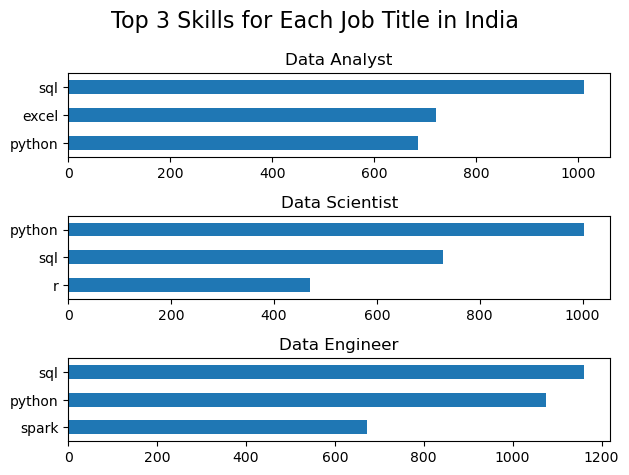

In [56]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    # Filter and reset index for plotting
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(3).reset_index()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title, legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')

fig.suptitle('Top 3 Skills for Each Job Title in India', fontsize=16)
plt.tight_layout()

In [58]:
df_jobs_count = df_india['job_title_short'].value_counts().reset_index(name='jobs_total')

In [59]:
df_jobs_count

,job_title_short,jobs_total
0,Data Analyst,2056
1,Data Engineer,1855
2,Data Scientist,1602
3,Business Analyst,661
4,Senior Data Engineer,425
5,Senior Data Analyst,400
6,Senior Data Scientist,301
7,Software Engineer,239
8,Machine Learning Engineer,71
9,Cloud Engineer,50


In [71]:
df_skills_perc = pd.merge(df_jobs_count, df_skills_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100

df_skills_perc

,job_title_short,jobs_total,job_skills,skill_count,skill_percent
0,Data Analyst,2056,sql,1012,49.221790
1,Data Analyst,2056,excel,722,35.116732
2,Data Analyst,2056,python,685,33.317121
3,Data Analyst,2056,tableau,545,26.507782
4,Data Analyst,2056,power bi,408,19.844358
...,...,...,...,...,...
1218,Cloud Engineer,50,express,1,2.000000
1219,Cloud Engineer,50,dynamodb,1,2.000000
1220,Cloud Engineer,50,splunk,1,2.000000
1221,Cloud Engineer,50,docker,1,2.000000


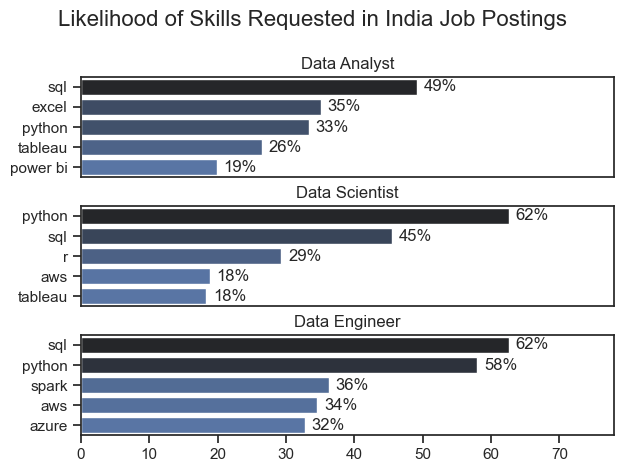

In [88]:
fig, ax =plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
  df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
  # df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title, legend=False)
  sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], palette='dark:b_r', hue='skill_count')
  ax[i].set_title(job_title)
  ax[i].set_ylabel('')
  ax[i].set_xlabel('')
  ax[i].legend().set_visible(False)
  ax[i].set_xlim(0, 78)

  for n, v in enumerate(df_plot['skill_percent']):
    ax[i].text(v+1, n, f'{int(v)}%', va='center')

  if i != len(job_titles) -1:
    ax[i].set_xticks([])


fig.suptitle('Likelihood of Skills Requested in India Job Postings', fontsize=16)
fig.tight_layout(h_pad=0.5)
plt.show()